### Importing and Understanding Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing Housing.csv
housing = pd.read_csv('newhousing.csv')

In [3]:
# Looking at the first five rows
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [4]:
housing.shape

(545, 16)

In [5]:
# What type of values are stored in the columns?
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            545 non-null    int64  
 1   area             545 non-null    int64  
 2   bedrooms         545 non-null    int64  
 3   bathrooms        545 non-null    int64  
 4   stories          545 non-null    int64  
 5   mainroad         545 non-null    int64  
 6   guestroom        545 non-null    int64  
 7   basement         545 non-null    int64  
 8   hotwaterheating  545 non-null    int64  
 9   airconditioning  545 non-null    int64  
 10  parking          545 non-null    int64  
 11  prefarea         545 non-null    int64  
 12  semi-furnished   545 non-null    int64  
 13  unfurnished      545 non-null    int64  
 14  areaperbedroom   545 non-null    float64
 15  bbratio          545 non-null    float64
dtypes: float64(2), int64(14)
memory usage: 68.2 KB


## Splitting Data into Training and Testing Sets

In [6]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [7]:
# Putting feature variable to X
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

# Putting response variable to y
y = housing['price']

<AxesSubplot:>

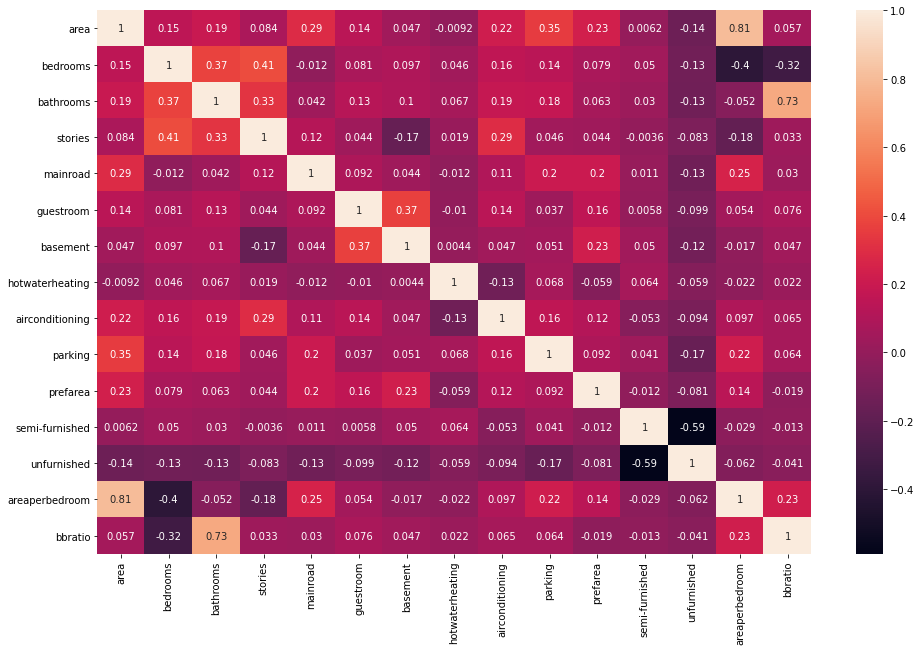

In [8]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
sns.heatmap(X.corr(),annot = True)

In [9]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X.transpose())

In [12]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())
p

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.

In [13]:
# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print(corrmat_diag_zero)
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)


[[ 0.          0.15185849  0.19381953  0.08399605  0.28887411  0.14029659
   0.04741699 -0.00922924  0.2223931   0.35298048  0.2347788   0.00615616
  -0.14227821  0.80561042  0.0571156 ]
 [ 0.15185849  0.          0.37393024  0.40856424 -0.01203324  0.0805487
   0.09731242  0.04604889  0.16060326  0.1392699   0.07902306  0.05003995
  -0.12625202 -0.39725852 -0.31730317]
 [ 0.19381953  0.37393024  0.          0.32616471  0.04239762  0.12646884
   0.10210571  0.0671591   0.18691503  0.17749582  0.06347174  0.02983353
  -0.13210748 -0.0523518   0.72715441]
 [ 0.08399605  0.40856424  0.32616471  0.          0.12170613  0.04353767
  -0.17239362  0.01884651  0.293602    0.04554709  0.04442487 -0.0036483
  -0.08297194 -0.17894208  0.0329617 ]
 [ 0.28887411 -0.01203324  0.04239762  0.12170613  0.          0.09233692
   0.04400208 -0.01178149  0.105423    0.20443255  0.19987578  0.01145033
  -0.13312327  0.2498294   0.03040739]
 [ 0.14029659  0.0805487   0.12646884  0.04353767  0.09233692  0.
 

### Question No. 1 and 2

In [14]:
?np.unravel_index

Docstring:
unravel_index(indices, shape, order='C')

Converts a flat index or array of flat indices into a tuple
of coordinate arrays.

Parameters
----------
indices : array_like
    An integer array whose elements are indices into the flattened
    version of an array of dimensions ``shape``. Before version 1.6.0,
    this function accepted just one index value.
shape : tuple of ints
    The shape of the array to use for unraveling ``indices``.

    .. versionchanged:: 1.16.0
        Renamed from ``dims`` to ``shape``.

order : {'C', 'F'}, optional
    Determines whether the indices should be viewed as indexing in
    row-major (C-style) or column-major (Fortran-style) order.

    .. versionadded:: 1.6.0

Returns
-------
unraveled_coords : tuple of ndarray
    Each array in the tuple has the same shape as the ``indices``
    array.

See Also
--------
ravel_multi_index

Examples
--------
>>> np.unravel_index([22, 41, 37], (7,6))
(array([3, 6, 6]), array([4, 5, 1]))
>>> np.unravel_index

In [1]:
# Retrieve the (i,j) index for which matrix has maximum value

ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape
#                 ## add code to solve for Question 1 and Question 2
)
print("ij_max is",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

NameError: name 'np' is not defined

In [17]:
import matplotlib.pyplot as plt
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
#Importing the PCA module
from sklearn.decomposition import PCA

In [18]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

from sklearn import preprocessing
X_scaler = preprocessing.StandardScaler().fit(X_train)
y_scaler = preprocessing.StandardScaler().fit(y_train.values.reshape(-1,1))
Xtrain=X_scaler.transform(X_train) 
ytrain=y_scaler.transform(y_train.values.reshape(-1,1)) 

Xtest=X_scaler.transform(X_test) 
ytest=y_scaler.transform(y_test.values.reshape(-1,1))

### Question No. 4

In [19]:
pca = PCA(n_components=6,random_state=100)

#Scale and transform data to get Principal Components

## add code for question no. 4
# fit_transform and transform to get the reduced data
# Xtrain_reduced = 
# Xtest_reduced = 


regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(Xtrain_reduced, ytrain)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca.predict(Xtest_reduced)
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pred))


NameError: name 'Xtrain_reduced' is not defined